In [1]:
from keras import layers
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.models import Model, load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.models import Model, load_model

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
inputs = Input(shape=(28, 28, 1))
l1 = layers.Conv2D(32, 3, activation='relu')(inputs)
l2 = layers.Conv2D(32, 3, activation='relu', padding='same')(l1)
l3 = layers.Conv2D(32, 3, activation='relu', padding='same')(l2)
l4 = layers.Conv2D(32, 3, activation='relu', padding='same')(l3)
l4 = layers.MaxPooling2D(2)(l4)
residual = layers.Conv2D(32, 1, strides=2)(l1)
# add the residual tensor back to the output features
l4 = layers.add([l4, residual])
# add dense layers
output = layers.Flatten()(l4)
output = layers.Dense(64, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)
model = Model(inputs,output)

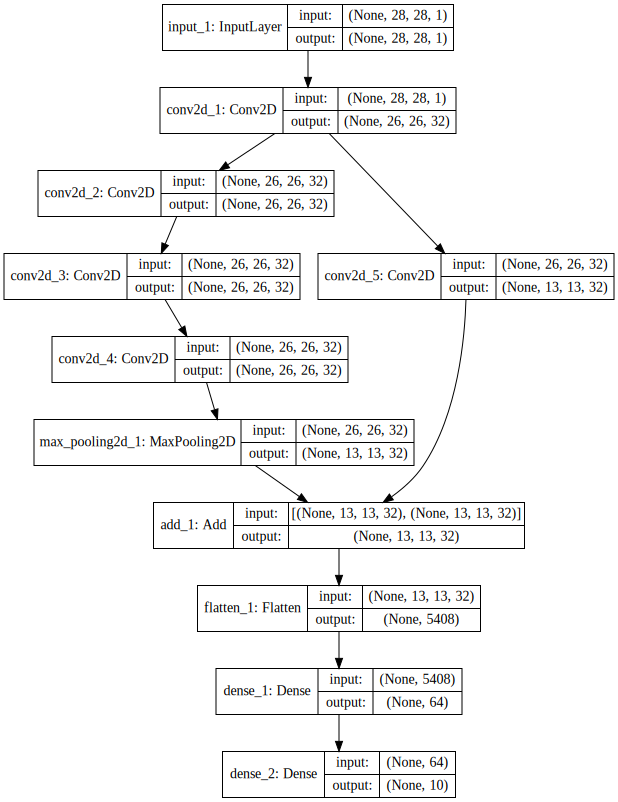

In [3]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
plot_model(model, to_file='RESIDUAL1.png')